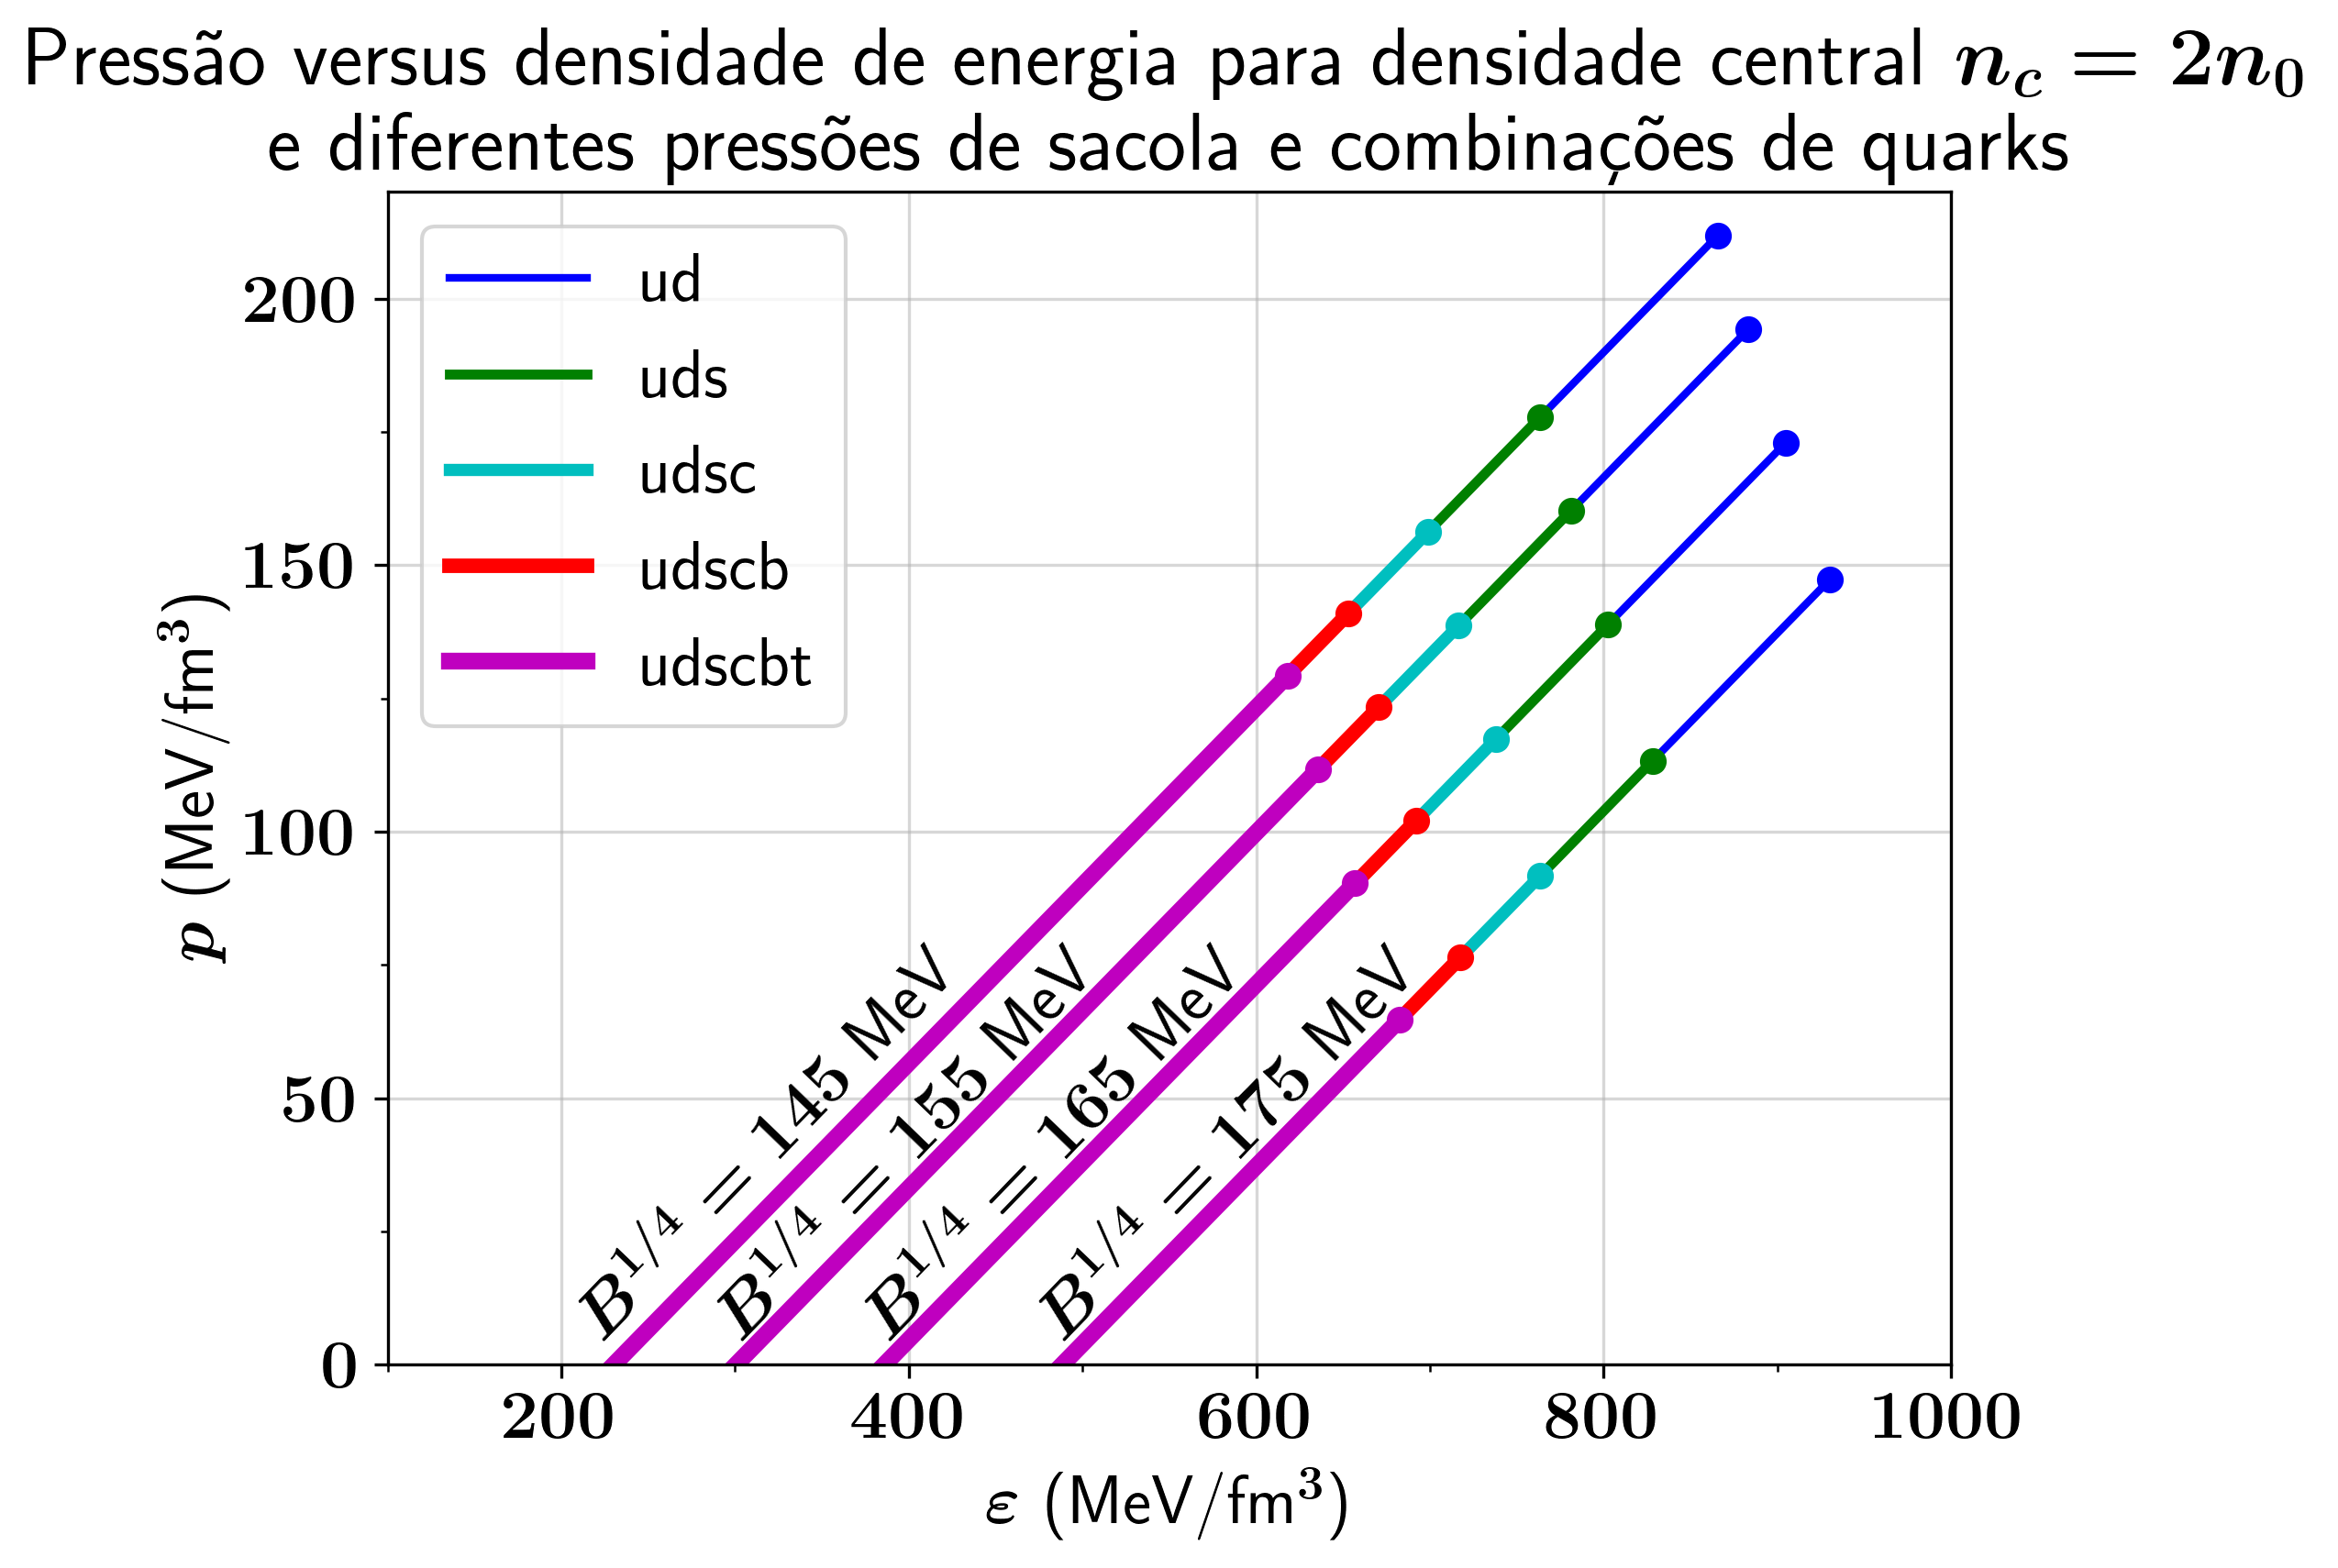

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\boldmath'
plt.rcParams["font.size"] = 18
plt.rcParams['figure.figsize'] = [7.3, 6]
plt.rcParams['figure.dpi'] = 300

fig, ax1 = plt.subplots()
#-------------------------------------------------------
bagPressures = []
bagPressures.append(145)
bagPressures.append(155)
bagPressures.append(165)
bagPressures.append(175)
titles = []
titles.append('ud')
titles.append('uds')
titles.append('udsc')
titles.append('udscb')
titles.append('udscbt')
dirs = []
for bP in bagPressures:
    for i in titles:
        dirs.append('../cpp/output/' + i + 'B' + str(bP) +'.dat')
#print(dirs)
cols = []
cols.append('b')
cols.append('g')
cols.append('c')
cols.append('r')
cols.append('m')

style = []
style.append('')
style.append('-.')
style.append('--')
style.append(':')
style.append('')

    
#ax1.set_title("$B^{1/4}$ = " + str(bagPressures[k]) + " MeV")
ax1.set_xlabel(r'$\varepsilon$ (MeV/fm$^3$)')
ax1.set_ylabel(r'$p$ (MeV/fm$^3$)')
ax1.set_xlim([100,1000])
#ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(MultipleLocator(100))
ax1.set_ylim([0,220])
ax1.yaxis.set_major_locator(MultipleLocator(50))
ax1.yaxis.set_minor_locator(MultipleLocator(25))
        
for i in range(len(titles)*len(bagPressures)):
    x = [] 
    with open(dirs[i], 'r') as f:   
            
        lines = f.readlines()
        x.append([float(line.split()[0]) for line in lines])
        x.append([float(line.split()[1]) for line in lines])
        x.append([float(line.split()[2]) for line in lines])
        x.append([float(line.split()[3]) for line in lines])

        ax1.grid(True, alpha=0.5)
        #ax1.plot([x[i][3][0],x[i][3][0]], [x[i][1][0],0] ,'--', color='tab:gray')
        #ax1[k].plot([0,x[i][3][0]], [x[i][1][0],x[i][1][0]] ,'--', color='tab:gray')
        if i >= 5:
            ax1.plot(x[3],x[1], cols[i%5], linewidth = (0.6*(i%5))+2)

        else:
            ax1.plot(x[3],x[1], cols[i%5], label=str(titles[i%5]), linewidth = (0.6*(i%5))+2)
        ax1.plot(x[3][0],x[1][0], 'o', color=cols[i%5])   
        #print(dirs[i], "|| Color: ", cols[i%5])

rot = 46
plt.annotate('$B^{1/4} = 145$ MeV', (205,5), rotation = rot)
plt.annotate('$B^{1/4} = 155$ MeV', (285,5), rotation = rot)
plt.annotate('$B^{1/4} = 165$ MeV', (370,5), rotation = rot)
plt.annotate('$B^{1/4} = 175$ MeV', (470,5), rotation = rot)
ax1.legend(loc='upper left')
ax1.set_title("Pressão versus densidade de energia para densidade central $n_c = 2n_0$\ne diferentes pressões de sacola e combinações de quarks")
fig.tight_layout(pad=1)
plt.show()